![Mikly Way](https://images.unsplash.com/photo-1515705576963-95cad62945b6?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=2070&q=80)
**Our galaxy is a cluster too!**
(Credit: Photo from the Unspash website for stock photos)

In [1]:
%run ../common-imports.ipynb

# DBSCAN hyperparameter sensitivity

The clustering algorithm DBSCAN has two hyperparameters:

* $\epsilon$: the radius of the neighborhood (of directly reachable neighbors)
* $nPts$: the minimum number of data-points within a point's $\epsilon$-neighborhood for it to be considered a interior (aka core) point.

This notebook will illustrate the sensitivity of the DBSCAN clustering to the choice of hyperparameter values. we will see that different choices of these values can ensue into markedly different detected clusters in the same dataset.

## Generate synthetic dataset

will generate a simple dataset by sampling from two gaussians with different means and covariances $(\mu, \Sigma)$.

This gives us $\textit{a priori}$ knowledge of the number of clusters, as well as which cluster a point truly belongs to (which gaussian it was sampled from). **This is an atypical situation: in most real-world situation, the ground truth labels are unknown.**

In [2]:
μ1, Σ1  = [0,0], [(1, 0.5), (0.5, 1)]
μ2, Σ2  = [6,6], [(3, 0.5), (0.5, 5)]
c1       = np.random.multivariate_normal(μ1, Σ1, 200)
c2       = np.random.multivariate_normal(μ2, Σ2, 200)

c1data = pd.DataFrame(data=c1, columns=["x1", "x2"])
c2data = pd.DataFrame(data=c2, columns=["x1", "x2"])
c1data['label'] = 1
c2data['label'] = 2
data = c1data.append(c2data)
data.describe(include='all')

,x1,x2,label
count,400.000000,400.000000,400.000000
mean,2.958616,2.943159,1.500000
std,3.295845,3.411929,0.500626
min,-2.372410,-2.938186,1.000000
25%,0.011107,0.075918,1.000000
50%,2.077988,1.662709,1.500000
75%,5.953712,5.966647,2.000000
max,10.080591,12.342368,2.000000


## VISUALIZATION

Let us plot the data; on the left we show the data as it would normally appear (without *a priori* knowledge of the clusters). On the right, the same data is shown with the ground truth revealed.

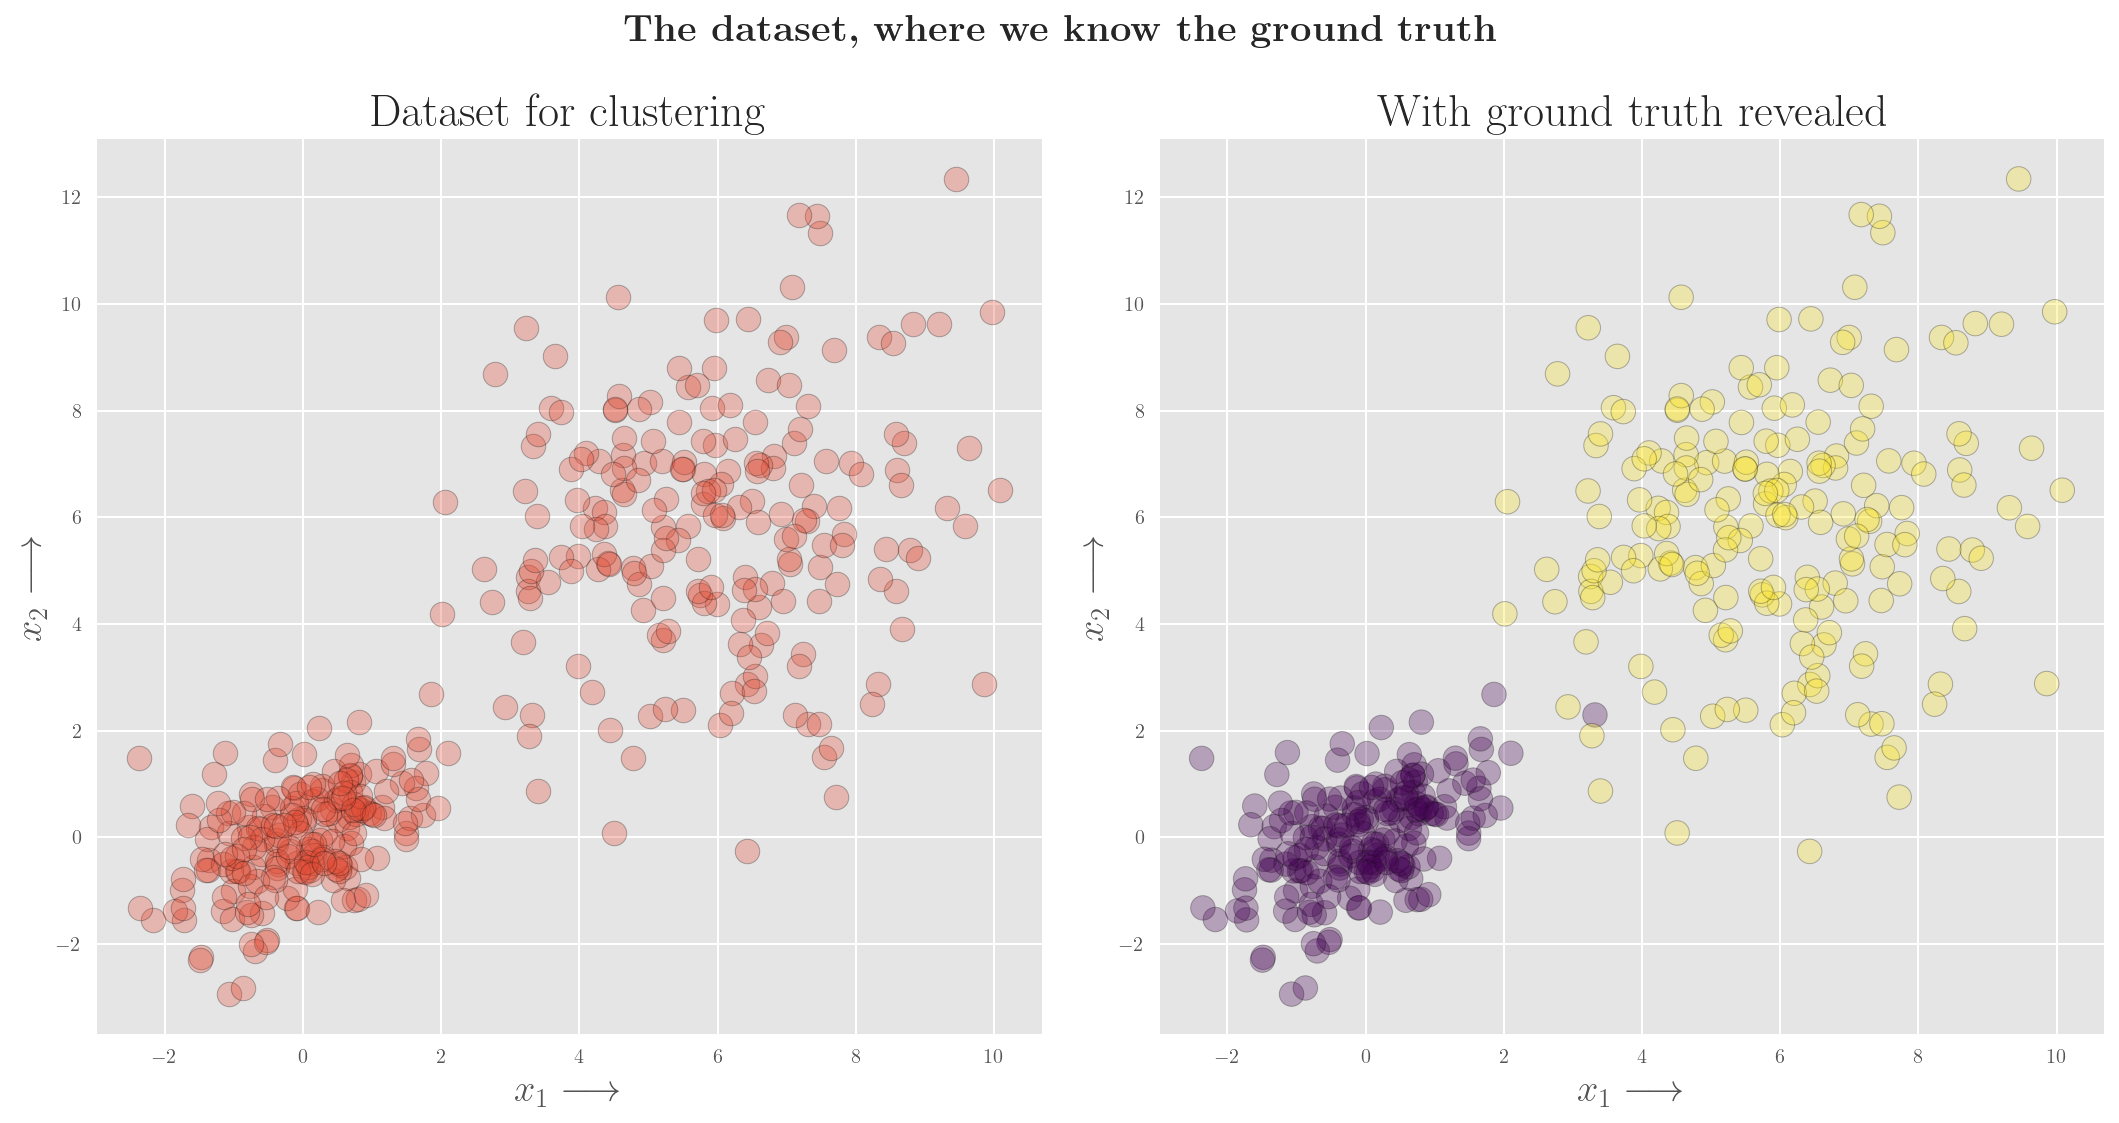

In [3]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,8))

# Scatterplots
ax1.scatter(data.x1, data.x2, s=150, alpha=0.3, edgecolor='k');
ax1.set_title('Dataset for clustering')

ax2.scatter(data.x1, data.x2, s=150, c=data.label, cmap='viridis', alpha=0.3, edgecolor='k');
ax2.set_title('With ground truth revealed')

for ax in [ax1, ax2]:
    ax.set_xlabel(r'$x_1\longrightarrow$')
    ax.set_ylabel(r'$x_2\longrightarrow$')

plt.suptitle(r'\textbf{ The dataset, where we know the ground truth}')
plt.tight_layout()

## DBSCAN Clustering

Let us now perform the DBSCAN clustering on this dataset, with different choices of the hyperparameters. For each combination of the hyperparameters ($\epsilon, nPts$), will do the following:

* create a subplot of the clustering
* capture the clustering quality metrics (most of which is possible only because we know the ground truth labels)

In order to do this and avoid repetitive code, let us create a function specific to this dataset:

In [4]:
%run dbscan_common.ipynb

### Cluster and visualize

Let us use DBSCAN for clustering and plot the clusters for the various hyperparameter values.

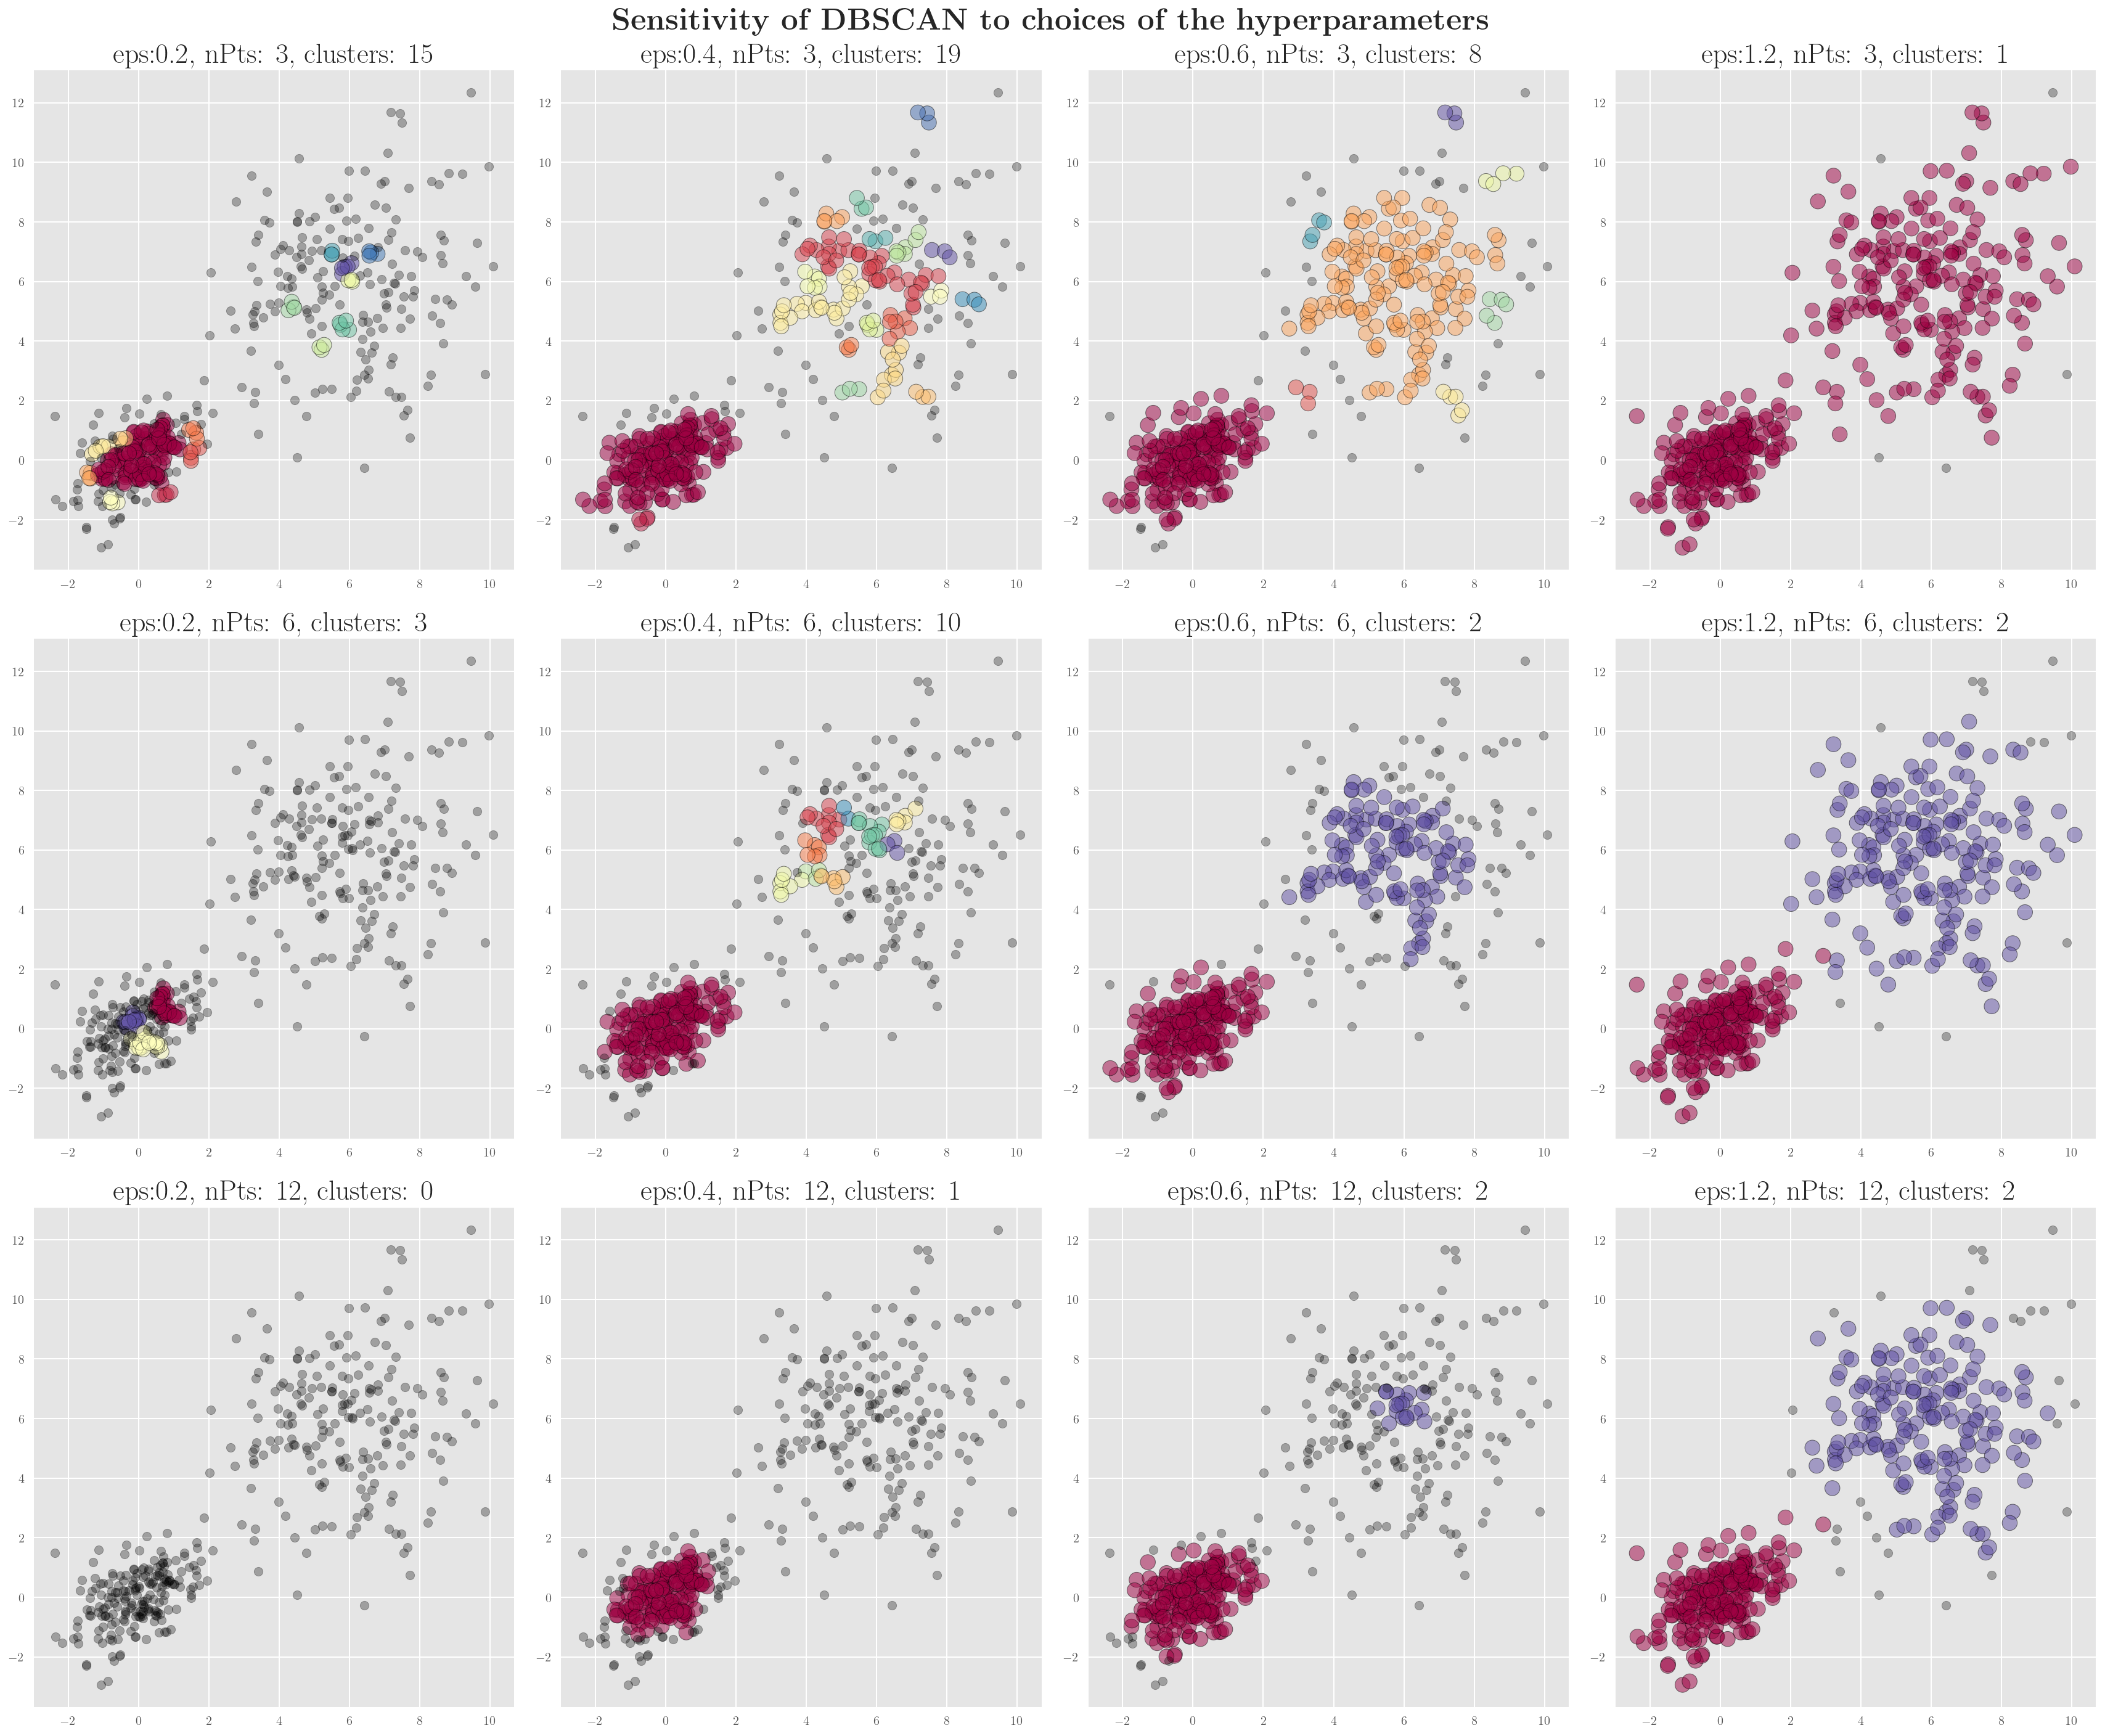

In [5]:
# Different values of the hyperparameters
epsilons = [0.2, 0.4, 0.6, 1.2]
neighbors = [3, 6, 12]

quality = dbscan_cluster(epsilons=epsilons, neighbors=neighbors, data=data)

In the above plots, the outliers are marked in grey.

We observe that the clustering is markedly different for different values of the hyperparameters. **Which of these clusters would you consider optimal?**

### Clustering quality metrics
Let us now observe the clustering quality metrics, and see how it agrees with your intuition.

In [6]:
quality.style.highlight_max(color = 'lightgreen', axis = 0)

,epsilon,nPts,clusters,silhouette score,homogeniety,completeness,v-measure,adjusted rand index,adjusted mutual information
0,0.200000,3.000000,15.000000,0.286085,0.525538,0.277106,0.362875,0.320161,0.348165
1,0.400000,3.000000,19.000000,0.319663,0.845001,0.313199,0.457008,0.464622,0.444761
2,0.600000,3.000000,8.000000,0.387500,0.930987,0.524267,0.670791,0.725657,0.666738
3,1.200000,3.000000,1.000000,0.250091,0.012614,0.130117,0.022999,0.000501,0.019256
4,0.200000,6.000000,3.000000,0.004804,0.178865,0.206446,0.191668,0.066359,0.186813
5,0.400000,6.000000,10.000000,0.328329,0.705924,0.377564,0.491988,0.518155,0.484506
6,0.600000,6.000000,2.000000,0.496330,0.892991,0.588567,0.709503,0.692548,0.708664
7,1.200000,6.000000,2.000000,0.616931,0.954809,0.820478,0.882561,0.924099,0.882158
8,0.200000,12.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
9,0.400000,12.000000,1.000000,0.407248,0.493423,0.528251,0.510243,0.488834,0.509324


## Conclusion

DBSCAN clustering is sensitive to the choice of hyperparameters. In particular, when we have clusters of varying densities, as in this case, it tends to not so effective.
